In [1]:
#clalify the google drive path
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import things to use / define the functions to use
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time as tm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [0]:
#load the data, single game as an example
time_test = pd.read_csv("/content/drive/My Drive/ssac_hackthon_2020/explore-shottracker/timeseries/M_17472065-4ad8-11ea-9084-0242bdc61da9/M_17472065-4ad8-11ea-9084-0242bdc61da9_playerLocations.csv", 
                        sep=",", nrows=1000000) #first rows as an example
ballloc = pd.read_csv("/content/drive/My Drive/ssac_hackthon_2020/explore-shottracker/timeseries/M_17472065-4ad8-11ea-9084-0242bdc61da9/M_17472065-4ad8-11ea-9084-0242bdc61da9_ballLocations.csv", sep=",")

In [4]:
ballloc.head()

,timestamp,eventVersion,event,sessionID,sessionState,ballSensorID,X,Y,Z,batteryMillivolts,batterPercentage
0,1581217867099,1,enrichedball,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,2147575795,1019,-421,2531,3711,38
1,1581217867109,1,enrichedball,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,2147575795,1030,-389,2525,3711,38
2,1581217867116,1,enrichedball,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,2147575795,1040,-358,2519,3711,38
3,1581217867124,1,enrichedball,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,2147575795,1051,-330,2514,3711,38
4,1581217867133,1,enrichedball,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,2147575795,1061,-302,2505,3711,38


In [5]:
time_test.head()

,timestamp,eventVersion,event,sessionID,sessionState,group,playerID,playerSensorID,X,Y,Z,batteryMillivolts,batterPercentage
0,1581217867099,1,enrichedplayer,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,1713,67348,105248,-423,-507,1824,4024.0,89.0
1,1581217867100,1,enrichedplayer,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,1713,67351,105765,-2589,-2555,1599,3992.0,86.0
2,1581217867100,1,enrichedplayer,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,1713,67346,105764,1872,-712,1789,4107.0,100.0
3,1581217867100,1,enrichedplayer,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,1714,67363,105172,455,-2357,1934,4138.0,100.0
4,1581217867100,1,enrichedplayer,1773d61b-4ad8-11ea-83c8-024282923f19,LIVE,1714,67361,105068,-3024,-845,1568,4118.0,100.0


In [0]:
#use the head t as a test
ttest = 1581217867100

In [0]:
#load the action data to overlay
player = 67351
action_data_path = "/content/drive/My Drive/ssac_hackthon_2020/action_output_test/{0}allchunk.tsv".format(int(player))
actions = pd.read_csv(action_data_path, sep="\t", index_col=0)
#and subset to relevent time period, +-30s of the t of interest
ac_intr = actions[(actions.timestamp>ttest-3*10**4)&(actions.timestamp<ttest+3*10**4)]

In [10]:
#visualize it using celluroid
pip install celluloid

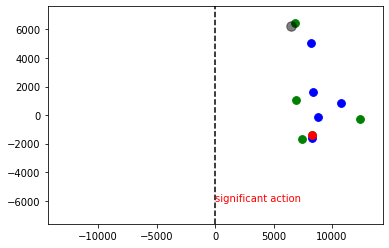

In [12]:
#this will generate the video in the github repo when active

from celluloid import Camera
from IPython.display import HTML
camera = Camera(plt.figure())
for i in range(250): #0.1s resolution, for 10s as an example
    sub = time_test[(time_test.timestamp>ttest+i*100-50)&(time_test.timestamp<ttest+i*100+50)] #ave. over +-0.05s
    team1 = sub[sub.group==1713]
    team2 = sub[sub.group==1714] 
    subball = ballloc[(ballloc.timestamp>ttest+i*100-50)&(ballloc.timestamp<ttest+i*100+50)] #ave. over +-0.05s
    plt.scatter(team1.groupby("playerID").Y.mean().sort_index(), team1.groupby("playerID").X.mean().sort_index(), color="green", s=60)
    plt.scatter(team2.groupby("playerID").Y.mean().sort_index(), team2.groupby("playerID").X.mean().sort_index(), color="blue", s=60)
    plt.scatter(subball.Y.mean(), subball.X.mean(), color="black", alpha=0.5, s=90)
    #if action, overlay
    #1st action:
    flag =  (ac_intr.timestamp - 50 < ttest+i*100) & (ac_intr.timestamp + ac_intr.action_duration*10**3 +50 <ttest+i*100)
    ac = ac_intr[flag]
    if ac.shape[0]>0:
      plt.text(0, -6000, "significant action", color="red")
      plt.scatter(team1[team1.playerID==67351].Y.mean(), team1[team1.playerID==67351].X.mean(), color="red", s=60)

    plt.ylim(-7620, 7620)
    plt.xlim(-14325.6, 14325.6)
    plt.axvline(x=0, linestyle="--", color="black")
    camera.snap()
anim = camera.animate(blit=True)

HTML(anim.to_html5_video())



In [0]:
#future work involves doing this automatically given the data